In [728]:
import pandas as pd
import numpy as np
import datetime
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
import time
from webdriver_manager.chrome import ChromeDriverManager
import re


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

In [370]:
url = 'https://www.autotrader.com/cars-for-sale/Used+Cars/GMC/Yukon/Abilene+TX-79606?maxMileage=100000&makeCodeList=GMC&listingTypes=USED&searchRadius=0&modelCodeList=YUKON&zip=79606&startYear=2015&endYear=2017&marketExtension=true&sortBy=relevance&numRecords=25&firstRecord={page_num}'
page_num = 0

a = Autotrader(url = url)
a.getAllPagesData(max_page=50)


Looking for [chromedriver 78.0.3904.70 mac64] driver in cache 
File found in cache by path [/Users/williamcasey/.wdm/drivers/chromedriver/78.0.3904.70/mac64/chromedriver]

Looking for [chromedriver 78.0.3904.70 mac64] driver in cache 
File found in cache by path [/Users/williamcasey/.wdm/drivers/chromedriver/78.0.3904.70/mac64/chromedriver]

Looking for [chromedriver 78.0.3904.70 mac64] driver in cache 
File found in cache by path [/Users/williamcasey/.wdm/drivers/chromedriver/78.0.3904.70/mac64/chromedriver]

Looking for [chromedriver 78.0.3904.70 mac64] driver in cache 
File found in cache by path [/Users/williamcasey/.wdm/drivers/chromedriver/78.0.3904.70/mac64/chromedriver]

Looking for [chromedriver 78.0.3904.70 mac64] driver in cache 
File found in cache by path [/Users/williamcasey/.wdm/drivers/chromedriver/78.0.3904.70/mac64/chromedriver]

Looking for [chromedriver 78.0.3904.70 mac64] driver in cache 
File found in cache by path [/Users/williamcasey/.wdm/drivers/chromedriver/7

## Save the scraped data as a local CSV

In [371]:
a.df.to_csv('car_data.csv')

## Reload the data from the local CSV

In [683]:
df = pd.read_csv('car_data.csv')

In [713]:
# df[df['type'] == '2WD']

# df.at[649, 'type'] = 'SLE'

In [684]:
df['price']  = df.price.apply(lambda x: x[:6].replace(",", "")).astype('int')

In [685]:
df['mileage'] = df.mileage.apply(lambda x: x.split()[0].replace(",", "")).astype('int')

In [686]:
def get_regex_item(name, pattern):
    item = re.search(pattern, name)
    if item is None:
        return None
    else:
        return item.group()

In [687]:
df.head(20)

Unnamed: 0                                 name  price  mileage  \
0            0              Used 2016 GMC Yukon SLE  32982    36845   
1            1       Used 2016 GMC Yukon 4WD Denali  45500    32222   
2            2       Used 2015 GMC Yukon 2WD Denali  34498    78056   
3            3       Used 2015 GMC Yukon 2WD Denali  33499    80435   
4            4       Used 2015 GMC Yukon 4x4 Denali  33750    83293   
5            5              Used 2017 GMC Yukon SLT  34750    69962   
6            6       Used 2017 GMC Yukon 2WD Denali  46000    37872   
7            7       Used 2015 GMC Yukon 2WD Denali  31888    90566   
8            8              Used 2016 GMC Yukon SLE  29900    56016   
9            9          Used 2015 GMC Yukon 2WD SLT  32495    71358   
10          10       Used 2015 GMC Yukon 2WD Denali  39999    51927   
11          11          Used 2016 GMC Yukon 2WD SLT  33900    55208   
12          12       Used 2015 GMC Yukon 4x4 Denali  31999    80370   
13          13       Used 2016 GMC Yukon 2WD Denali  40000    51670   
14          14       Used 2015 GMC Yukon 4x4 Denali  38990    65465   
15          15          Used 2017 GMC Yukon 2WD SLE  35999    44234   
16          16       Used 2015 GMC Yukon 2WD Denali  37000    57070   
17          17          Used 2015 GMC Yukon 4WD SLE  30668    76546   
18          18          Used 2015 GMC Yukon 4WD SLT  32621    91764   
19          19  Certified 2017 GMC Yukon 4WD Denali  49987    37909   

           miles_away      phone_number  \
0     (1007 mi. away)               NaN   
1   (1186.3 mi. away)               NaN   
2      (1.8 mi. away)               NaN   
3      (2.9 mi. away)               NaN   
4      (3.3 mi. away)               NaN   
5      (3.3 mi. away)               NaN   
6      (3.3 mi. away)               NaN   
7      (3.3 mi. away)               NaN   
8      (4.4 mi. away)               NaN   
9     (21.5 mi. away)               NaN   
10    (21.5 mi. away)               NaN   
11    (25.8 mi. away)               NaN   
12    (57.5 mi. away)               NaN   
13    (64.4 mi. away)               NaN   
14      (77 mi. away)  1 (877) 991-5799   
15    (77.6 mi. away)               NaN   
16    (85.2 mi. away)               NaN   
17  (1146.3 mi. away)    (248) 781-0937   
18  (1364.3 mi. away)    (707) 756-7128   
19   (118.2 mi. away)    (682) 500-1162   

                                      dealership_name  
0     North County Buick Cadillac GMC (1007 mi. away)  
1   Lavery Automotive Sales & Service (1186.3 mi. ...  
2                          4M Autoplex (1.8 mi. away)  
3                     Honda of Abilene (2.9 mi. away)  
4          Lawrence Hall Lincoln Mazda (3.3 mi. away)  
5          Lawrence Hall Lincoln Mazda (3.3 mi. away)  
6          Lawrence Hall Lincoln Mazda (3.3 mi. away)  
7                Volkswagen of Abilene (3.3 mi. away)  
8                               Dealer (4.4 mi. away)  
9                Hanner Chevrolet GMC (21.5 mi. away)  
10               Hanner Chevrolet GMC (21.5 mi. away)  
11  Lawrence Hall Chevrolet Buick GMC (25.8 mi. away)  
12              Stanley Ford Eastland (57.5 mi. away)  
13  Stanley Chrysler Dodge Jeep Brownwood (64.4 mi...  
14       Bayer Chevrolet Ford GMC Buick (77 mi. away)  
15                 Mitchell Buick GMC (77.6 mi. away)  
16                             Dealer (85.2 mi. away)  
17       Suburban Buick-GMC of Troy (1146.3 mi. away)  
18  McConnell Chevrolet Chrysler Jeep Dodge RAM (1...  
19  Classic Chevrolet Buick GMC - Granbury (118.2 ...

In [688]:

df['4wd'] = df.name.apply(lambda x: 1 if get_regex_item(x, pattern= r'4[a-zA-Z]{2}') else 0)
# df['miles_away'] = df.miles_away.apply(lambda x: float("".join([s for s in x if s.isdigit()])))
df['year'] = df.name.apply(lambda x: get_regex_item(x, pattern= r'\d{4}'))
df['type'] = df.name.apply(lambda x: x.split()[-1])
df['certified'] = df.name.apply(lambda x: 1 if get_regex_item(x.lower(), r'certified') else 0)

In [689]:
df = df.drop(columns='Unnamed: 0')

In [690]:
df.head()

name  price  mileage         miles_away  \
0         Used 2016 GMC Yukon SLE  32982    36845    (1007 mi. away)   
1  Used 2016 GMC Yukon 4WD Denali  45500    32222  (1186.3 mi. away)   
2  Used 2015 GMC Yukon 2WD Denali  34498    78056     (1.8 mi. away)   
3  Used 2015 GMC Yukon 2WD Denali  33499    80435     (2.9 mi. away)   
4  Used 2015 GMC Yukon 4x4 Denali  33750    83293     (3.3 mi. away)   

  phone_number                                    dealership_name  4wd  year  \
0          NaN    North County Buick Cadillac GMC (1007 mi. away)    0  2016   
1          NaN  Lavery Automotive Sales & Service (1186.3 mi. ...    1  2016   
2          NaN                         4M Autoplex (1.8 mi. away)    0  2015   
3          NaN                    Honda of Abilene (2.9 mi. away)    0  2015   
4          NaN         Lawrence Hall Lincoln Mazda (3.3 mi. away)    0  2015   

     type  certified  
0     SLE          0  
1  Denali          0  
2  Denali          0  
3  Denali          0  
4  Denali          0

In [691]:
df.groupby('type')['price'].mean()

type
2WD       33999.000000
4WD       43500.000000
Denali    41069.847291
SLE       33291.040650
SLT       36079.808889
Name: price, dtype: float64

In [714]:
model_df = pd.get_dummies(data=df[['price', 'mileage', '4wd', 'year', 'type', 'certified']],drop_first = True)
# model_df = df[['price', 'mileage', '4wd', 'year', 'type', 'certified']]

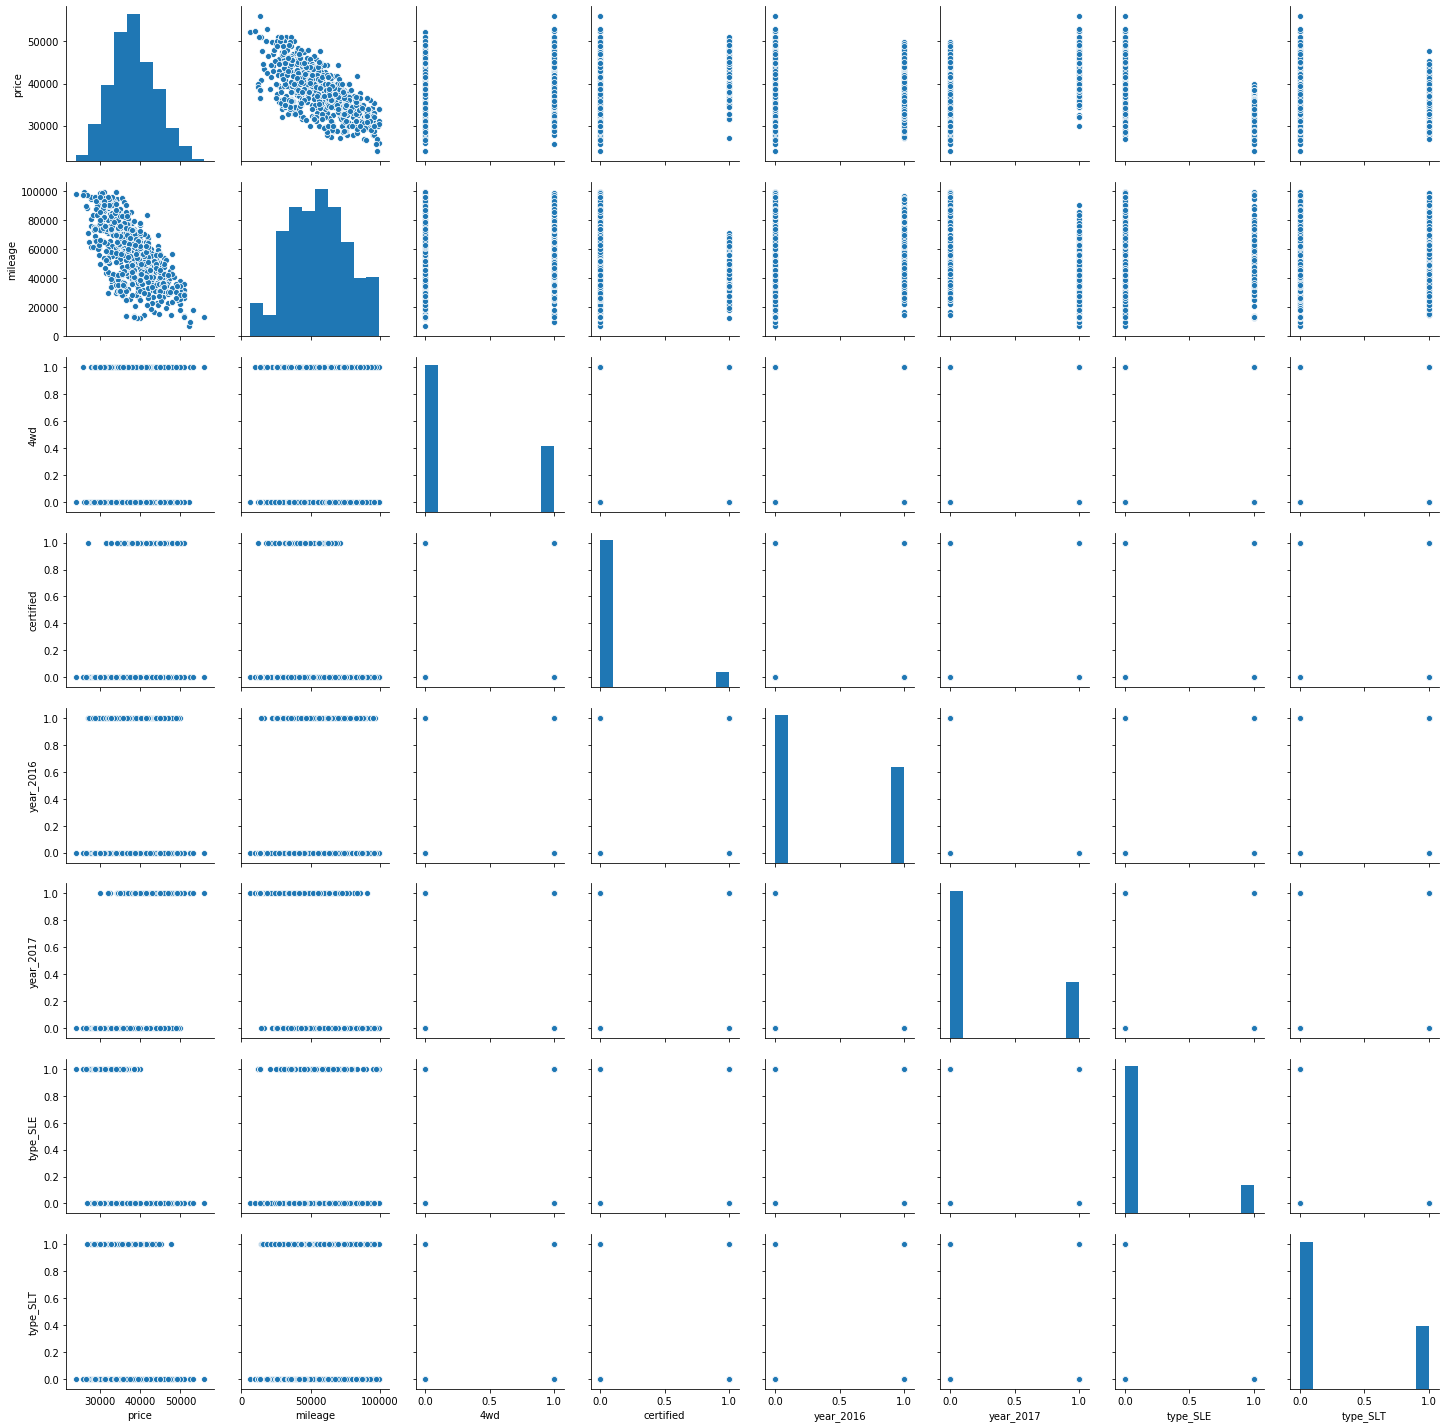

In [715]:
sns.pairplot(model_df)

34900

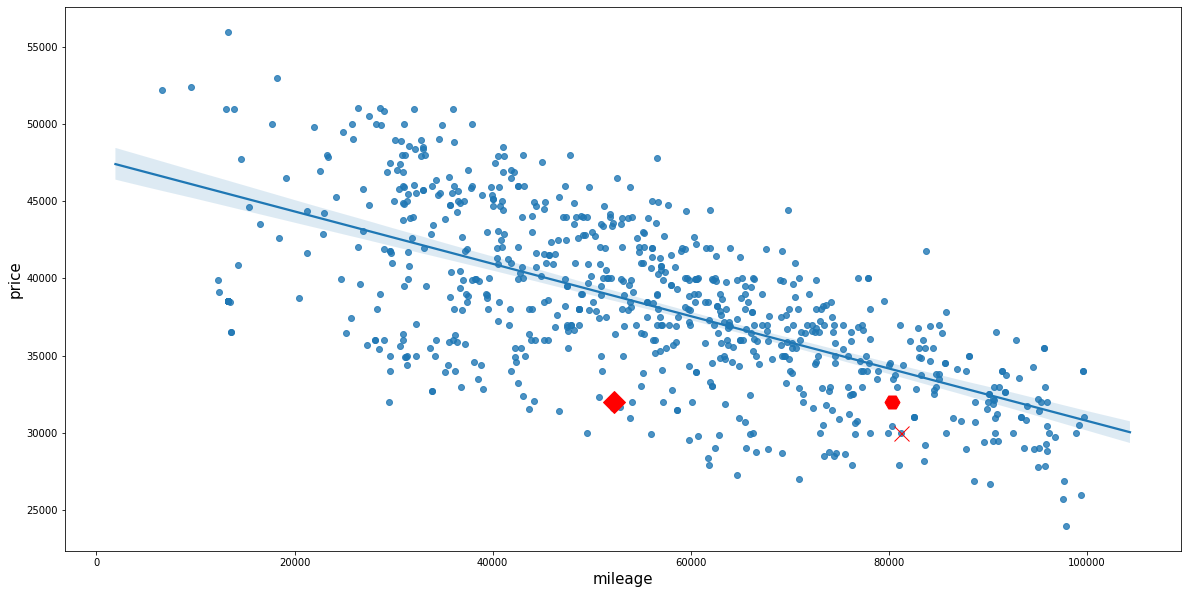

In [772]:
highlight = 12

fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_ylabel("Price", fontsize=15)
ax1.set_xlabel("Mileage", fontsize=15)
sns.regplot(x=df.mileage, y=df.price, )
plt.plot(df.loc[highlight].mileage, df.loc[highlight].price, marker='H', markersize=15, color='red', )
plt.plot(df.loc[374].mileage, df.loc[374].price, marker='x', markersize=15, color='red')
plt.plot(df.loc[203].mileage, df.loc[203].price, marker='D', markersize=15, color='red')


# plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


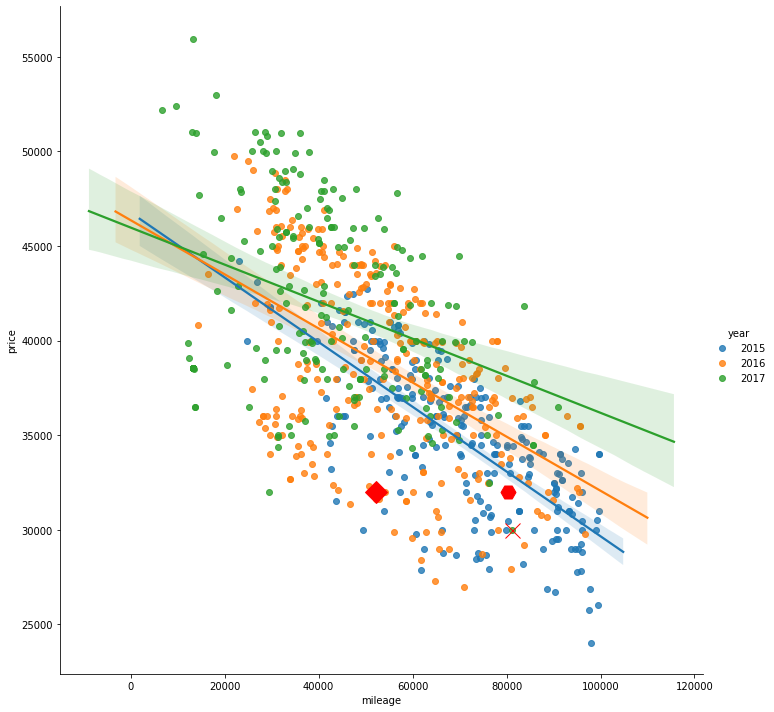

In [774]:

ax1.set_ylabel("Price", fontsize=15)
ax1.set_xlabel("Mileage", fontsize=15)
sns.lmplot(x='mileage', y='price', data = df,  hue='year', size=10)
plt.plot(df.loc[highlight].mileage, df.loc[highlight].price, marker='H', markersize=15, color='red')
plt.plot(df.loc[374].mileage, df.loc[374].price, marker='x', markersize=15, color='red')
plt.plot(df.loc[203].mileage, df.loc[203].price, marker='D', markersize=15, color='red')


# plt.show()

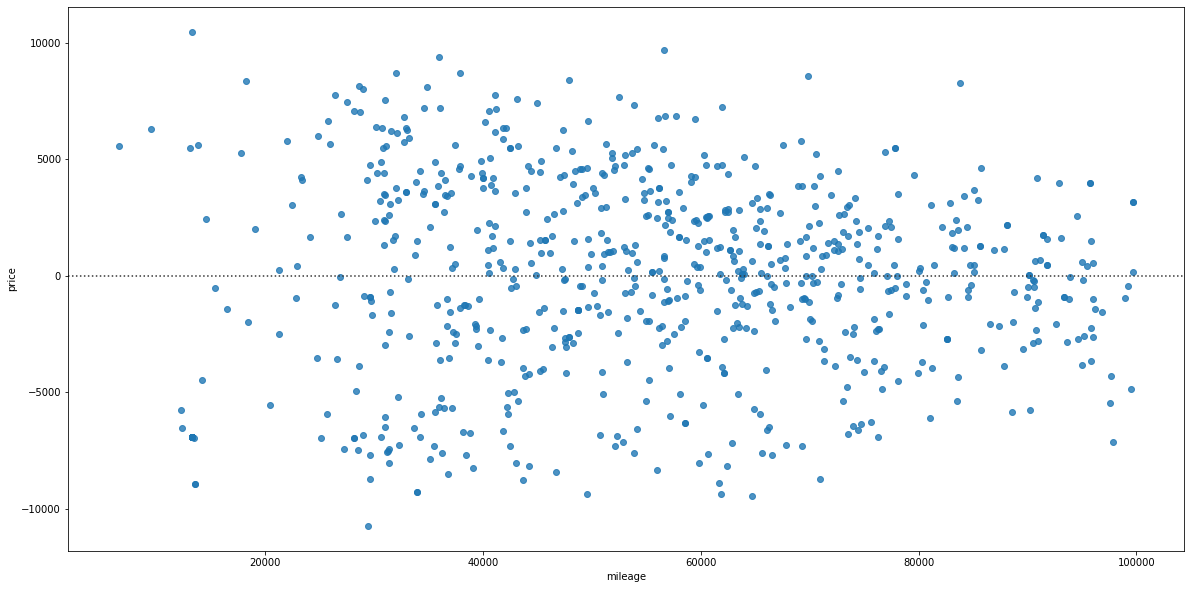

In [717]:
fig, ax1 = plt.subplots(figsize=(20, 10))
sns.residplot(x=model_df.mileage, y=model_df.price)


In [718]:
y = model_df.price
X = model_df.drop(columns='price')

In [719]:
# model = LinearRegression().fit(X=X, y=y)

In [720]:
model_df

price  mileage  4wd  certified  year_2016  year_2017  type_SLE  type_SLT
0    32982    36845    0          0          1          0         1         0
1    45500    32222    1          0          1          0         0         0
2    34498    78056    0          0          0          0         0         0
3    33499    80435    0          0          0          0         0         0
4    33750    83293    0          0          0          0         0         0
..     ...      ...  ...        ...        ...        ...       ...       ...
751  44999    56065    1          1          1          0         0         0
752  34104    86942    0          0          0          0         0         0
753  46990    41842    1          0          0          1         0         0
754  29995    96165    0          0          0          0         0         1
755  35872    35566    1          0          1          0         1         0

[756 rows x 8 columns]

In [798]:
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1170.
Date:                Mon, 11 Nov 2019   Prob (F-statistic):               0.00
Time:                        08:09:42   Log-Likelihood:                -6637.1
No. Observations:                 756   AIC:                         1.329e+04
Df Residuals:                     748   BIC:                         1.333e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.785e+04    259.124    184.656      0.0

In [722]:
model_df['predict'] = model.predict()
model_df['diff'] = model_df.price - model_df.predict

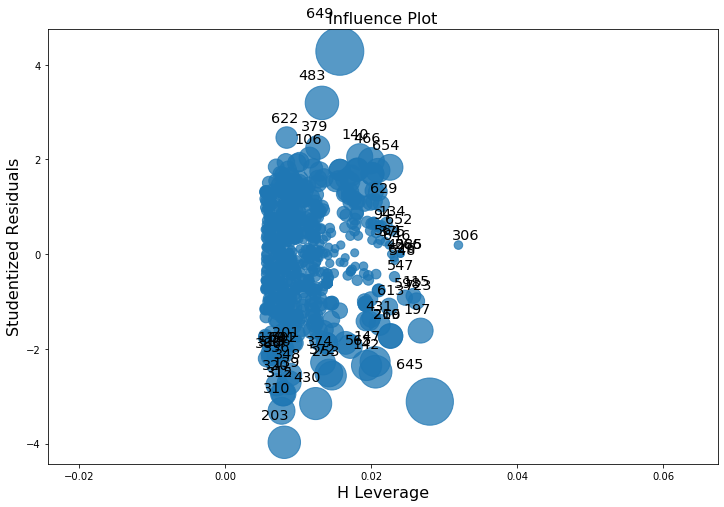

In [723]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

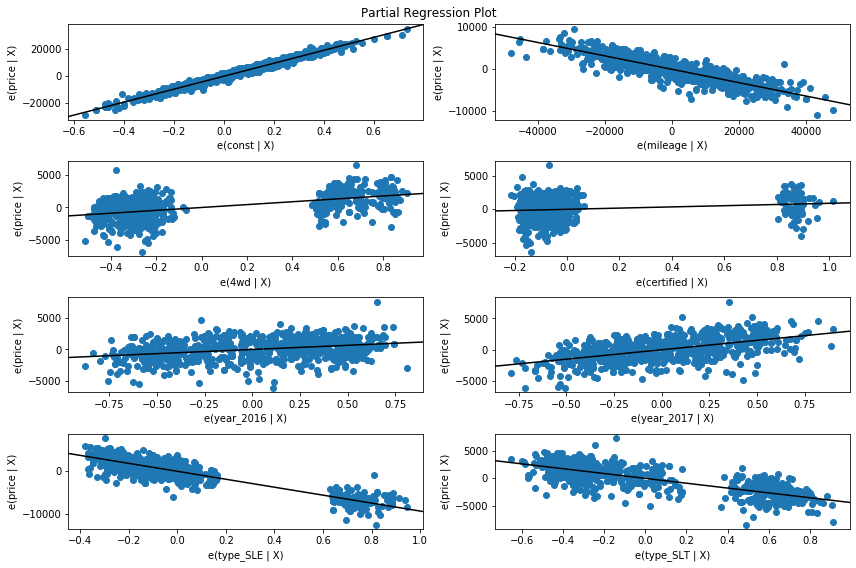

In [724]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [803]:
predict_df = pd.DataFrame(
    
    {'price': 32495
     , 'constant': 1
     , 'mileage': 71358
     , '4wd': 0
     , 'certified': 0
     , 'year_2016': 0
     , 'year_2017': 0
     , 'type_SLE': 0
     , 'type_SLT': 1
    
    
    }
    , index=[0]


)

predict_df['predict'] = model.predict(predict_df[['constant', 'mileage', '4wd', 'certified', 'year_2016', 'year_2017', 'type_SLE', 'type_SLT']])
predict_df['diff'] = predict_df.price - predict_df.predict
predict_df

price  constant  mileage  4wd  certified  year_2016  year_2017  type_SLE  \
0  32495         1    71358    0          0          0          0         0   

   type_SLT       predict        diff  
0         1  32139.276927  355.723073

In [725]:
model_df.sort_values('diff', ascending=True).head(30)

price  mileage  4wd  certified  year_2016  year_2017  type_SLE  type_SLT  \
203  31988    52270    0          0          0          1         0         1   
310  38499    45175    0          0          0          1         0         0   
430  31990    29488    0          0          0          1         1         0   
645  34900    31282    1          1          0          1         1         0   
315  35990    45555    0          0          0          0         0         0   
312  35000    43268    0          0          0          1         0         1   
320  38850    37556    0          0          1          0         0         0   
139  36974    41635    0          0          0          0         0         0   
253  29750    96793    0          0          1          0         0         0   
348  35000    77754    1          0          1          0         0         0   
572  39988    24740    0          0          0          0         0         0   
142  40845    14263    1          0          1          0         0         1   
565  38985    60321    1          1          1          0         0         0   
336  37655    63075    1          0          1          0         0         0   
374  29995    81220    0          0          0          1         0         1   
147  34333    59833    0          1          0          1         0         1   
386  34500    62143    0          0          0          0         0         0   
206  37900    62968    1          0          1          0         0         0   
515  38210    47333    0          0          1          0         0         0   
691  28473    73504    0          0          0          0         0         1   
502  36500    72573    1          0          1          0         0         0   
119  37971    49684    0          0          1          0         0         0   
201  29991    92578    0          0          0          0         0         0   
12   31999    80370    0          0          0          0         0         0   
215  38906    50900    0          1          1          0         0         0   
308  36789    72609    1          0          1          0         0         0   
184  38990    28607    0          0          0          1         0         1   
168  42000    26415    0          0          1          0         0         0   
304  36500    13571    0          0          0          1         1         0   
322  36500    13571    0          0          0          1         1         0   

          predict         diff  
203  38182.738094 -6194.738094  
310  43675.931889 -5176.931889  
430  36918.549867 -4928.549867  
645  39726.452460 -4826.452460  
315  40606.614644 -4616.614644  
312  39613.850109 -4613.850109  
320  43180.498906 -4330.498906  
139  41229.804946 -4255.804946  
253  33763.171373 -4013.171373  
348  38988.652489 -3988.652489  
572  43915.723353 -3927.723353  
142  44717.017537 -3872.017537  
565  42654.492360 -3669.492360  
336  41322.277602 -3667.277602  
374  33580.350531 -3585.350531  
147  37874.785926 -3541.785926  
386  37969.502212 -3469.502212  
206  41339.288154 -3439.288154  
515  41626.179624 -3416.179624  
691  31798.112032 -3325.112032  
502  39812.312937 -3312.312937  
119  41252.424420 -3281.424420  
201  33131.033629 -3140.033629  
12   35071.826284 -3072.826284  
215  41953.500019 -3047.500019  
308  39806.589760 -3017.589760  
184  41944.613635 -2954.613635  
168  44951.662976 -2951.662976  
304  39448.988653 -2948.988653  
322  39448.988653 -2948.988653

In [756]:
df.loc[374]

name                      Used 2017 GMC Yukon 2WD SLT
price                                           29995
mileage                                         81220
miles_away                           (934.2 mi. away)
phone_number                                      NaN
dealership_name    Alcoa Auto Center (934.2 mi. away)
4wd                                                 0
year                                             2017
type                                              SLT
certified                                           0
RF_predict                                      31729
Name: 374, dtype: object

In [726]:
print('aic', model.aic)
print('bic', model.bic)
print('rmse', sm.tools.eval_measures.rmse(model_df.predict, model_df.price))

aic 13290.17901541334
bic 13327.203346422775
rmse 1572.2773556736572
